In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r /content/drive/My\ Drive/New\ Dataset /content/Dataset

Clean and analyze the dataset.


Bathroom

Number of images: 180
{'Toilet': 132, 'Bathtub': 17, 'Sink': 56, 'Window': 4}
Min objects per image: 1
Max objects per image: 3
Avg objects per image: 1.1611111111111112


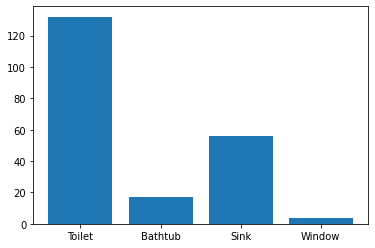


Bedroom

Number of images: 189
{'Bed': 209, 'Window': 23}
Min objects per image: 1
Max objects per image: 5
Avg objects per image: 1.2275132275132274


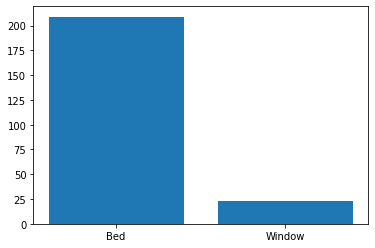


Kitchen

Number of images: 157
{'Sink': 35, 'Refrigerator': 53, 'Oven': 94, 'Window': 6}
Min objects per image: 1
Max objects per image: 4
Avg objects per image: 1.197452229299363


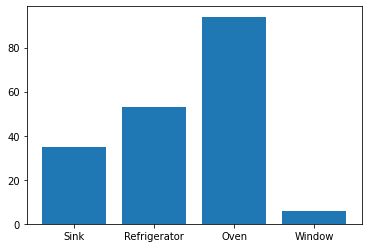

In [37]:
import os
import matplotlib.pyplot as plt

def clean_database(folder):
  image_names = os.listdir('/content/Dataset/' + folder)
  label_names = os.listdir('/content/Dataset/' + folder + '/Label')
  objects_found = {}
  num_images = len(image_names) - 1

  print("\n" + folder + "\n")
  print("Number of images: " + str(num_images))
  min = -1
  max = -1
  avg = 0

  for label in label_names:
    image_name = os.path.splitext(label)[0]+'.jpg'
    if image_name in image_names:
      f = open('/content/Dataset/' + folder + '/Label/' + label, "r")
      arr = f.read().split("\n")
      arr.remove('')

      if min == -1 or min > len(arr):
        min = len(arr)
      if max == -1 or max < len(arr):
        max = len(arr)
      avg += len(arr)

      for obj in arr:
        obj_name = obj.split(" ")[0]
        if obj_name in objects_found:
          objects_found[obj_name] += 1
        else:
          objects_found[obj_name] = 1
    else:
      os.remove('/content/Dataset/' + folder + '/Label/' + label)
    
  avg /= num_images
  print(objects_found)
  print("Min objects per image: " + str(min))
  print("Max objects per image: " + str(max))
  print("Avg objects per image: " + str(avg))

  plt.bar(objects_found.keys(), objects_found.values())
  plt.show()

clean_database('Bathroom')
clean_database('Bedroom')
clean_database('Kitchen')

Download dataset.

In [40]:
!zip -r /content/dataset.zip /content/Dataset
from google.colab import files
files.download('/content/dataset.zip')

  adding: content/Dataset/ (stored 0%)
  adding: content/Dataset/Bedroom/ (stored 0%)
  adding: content/Dataset/Bedroom/040f7caee109ab4b.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/1b4625dc2ae401f0.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/1f6d040583d081ec.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/2c438ba69023be9a.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/2ff51a0fcec50f88.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/37ff506923d56974.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/3a9b5c0b50efc934.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/44167b13e878ee25.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/44e4c2e081894be1.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/46c0d9150e908fa5.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/52556bb1af534e10.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/536fb55c0810af24.jpg (deflated 0%)
  adding: content/Dataset/Bedroom/54c9377f3a57cc46.jpg (deflated 1%)
  adding: content

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>